# DSFB Assignment 1

In this assignment, you will work with data, examine distributions of some variables, and make some simple predictions. These basic operations are important in any data science project. 

[Pandas](https://pandas.pydata.org/) is a Python package built for data analysis. It includes many useful functions, including one to read comma-separated (.csv) files. We will use this package as it's both easy to use and very powerful.

First, we need to import Pandas. As you will be learning (or already know), popular Python packages have common abbreviates. These abbreviations are used as a short-hand for that package throughout a Python script. Some of these common abbreviations include:

- `import pandas as pd`
- `import numpy as np`
- `import tensorflow as tf`
- etc.

Second, we can call any function in the Pandas package as `pd.someFunction`. The `pd` keyword is reserved for Pandas and must not be used by any other variable. 

Third, `import` statements are generally located at the top of a script, even though they might only be used at a later stage.

Finally, do not hesitate to search the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/) for help.


In [1]:
import os

from math import log
 
import numpy as np    
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy.stats import lognorm
from scipy.stats import gamma
from scipy.stats import beta
from scipy.special import expit

# PART 1: WORK WITH A TAB-SEPARATED TEXT FILE

In this section, you will load in a plain text file where columns have been separated by a tab character. The tab character is represented in code as the: `\t` symbol.   

Tab separated data is typical for government data or legacy data coming out of old mainframe systems.  

We will us data from the US Patent Office (USPTO). The file contains two columns:

- id: patent sub-class id
- title: patent sub-class title

**PROBLEM**: Open and read in the `USPTOsubclasses.txt` file using the native Python `open()` command.

In [210]:
# open the .txt file
file=open("data/USPTOsubclasses.txt","r")
contents = file.read()


**PROBLEM**: Make a list of lists. First, split the data by line, and the split it again by column. 

In [211]:
# split the raw text by the new line character "\n" )
lines = contents.split("\n")

In [212]:
# create a "list of lists" 
#   each entry in the "outer" list is a row from the file; 
#   each row can be split into an "inner" list of tab-separated columns
data = []
for line in lines:
    data.append(line.split("\t"))


In [215]:
# what's the sub-class "1/1" called?  hint: look at first 10 elements of your list...
print(data[0:10]) 



[['id', 'title'], ['-0T/74', 'NULL'], ['01L/294.8', 'NULL'], ['01L/298.8', 'NULL'], ['01L/299.0', 'NULL'], ['1/1', 'Unclassified'], ['100/1', 'BINDING'], ['100/10', 'With precutting of binder to length'], ['100/10.*1', 'WITH ADDITIONAL TREATMENT OF MATERIAL (100/70 R)'], ['100/100', 'WITH GROUND']]


**PROBLEM**: Turn the data into a Pandas dataframe and draw a random sample of 5 rows. 

In [216]:
# Hint: remember to split the header row from the data. It will be the first element in your list of lists
header = data[0]
data_only= data[1:]

# move data into a Pandas dataframe for easier manipulation
df = pd.DataFrame(data_only, columns=header)


In [217]:
# look at the dataframe
print(df.sample(n=5, random_state=1))



              id                                              title
96327     405/60                       Floatable matter containment
103864   425/166  Of intermittent delivery of fluent charges to ...
58077    285/323                                      Wedge bushing
120725    482/89                   From connections above and below
104108  425/382N                                            Netting


# PART 2: WORK WITH A CSV FILE IN PANDAS

In this section, we load data from the `data/epfl.csv` file into a pandas dataframe.  

The CSV file contains the courses offered at EPFL with the following two columns: 

  - course: full course name
  - code: course code, including field of study


**PROBLEM**: Load the data from `data/epfl.csv` into a Pandas dataframe.

In [2]:
# load the CSV 
EPFLcourses = pd.read_csv("data/epfl.csv") 


In [220]:
# look at the number of rows and columns (i.e., the shape)
EPFLcourses.shape
EPFLcourses.describe()


,course,field
count,1677,1677
unique,1490,25
top,Physique gènèrale i,HUM
freq,9,178


**PROBLEM**: Look at the data.

In [4]:
# look at the first 5 rows
print(EPFLcourses.iloc[0:5])


                                              course      code
0                             Accounting for finance   FIN-411
1                                Advanced algorithms    CS-450
2  Advanced analog and rf integrated circuits des...    EE-520
3  Advanced analog and rf integrated circuits des...    EE-521
4                                Advanced analysis i  MATH-400


In [5]:
# look at the last 5 rows
EPFLcourses.tail(n=5)

,course,code
1753,Water resources engineering,ENV-424
1754,Wave propagation along transmission lines,EE-575
1755,Wind energy,ETH-432
1756,Wireless receivers: algorithms and architectures,EE-442
1757,"Wood structures, properties and uses",MSE-466


In [6]:
# look at a random sample of 5 rows
EPFLcourses.sample(n=5, random_state=1)



,course,code
1598,Systëmes multivariables,ME-324
190,Biomedical optics,BIOENG-445
1233,Projet de master en bioingènierie et biotechno...,BIO-599
403,Design graphique iv,HUM-326
1065,Philosophie des sciences b,HUM-238


## Create a new column: " `field` " 

The next set of problems are intended to extract the field code (e.g.: CS, EE, MATH) from the course code column and put it in a new column called `field`.

**PROBLEM**: Create a new column called `field` and fill it with zeros.

In [7]:
# create a dummy column called 'field' filled with a marker to indicate the value is currently missing
#   hint: the numpy package defines a special value called NaN to indicate Not a Number... 
#         so set the new column to `np.nan`
EPFLcourses["field"] = np.NaN

**PROBLEM**: Fill the new column with the field of the course. What symbol do you split on?

In [21]:
# fill the 'field' column with the split code
EPFLcourses["field"] = EPFLcourses["code"].apply(lambda row: str(row).split("-"))

In [22]:
# select the first list element (index 0) for each field entry
EPFLcourses["field"] = EPFLcourses["field"].apply(lambda row: row[0])

## Now clean the dataset, find missing fields, and remove those entries.

**PROBLEM**: Look at some examples where a value for `field` is missing. What's a course without a code/field?

In [37]:
# look at the entries without a field
print(EPFLcourses[EPFLcourses["code"].isnull()==True].course)

161                   Autre contribution ‡ l'enseignement
162                   Autre contribution ‡ l'enseignement
244                     Chimie gènèrale avancèe (‡ choix)
334                                            Cours ethz
335                                            Cours ethz
336                                          Cours ethz 1
337                                          Cours ethz 1
338                       Cours euler, algëbre linèaire i
339                      Cours euler, algëbre linèaire ii
340                          Cours euler, analyse gymnase
341                                Cours euler, analyse i
342                               Cours euler, analyse ii
343                          Cours euler, chimie gènèrale
344                             Cours euler, gèomètrie ii
345                          Cours euler, mathèmatiques i
346                          Cours euler, mathèmatiques i
347                         Cours euler, mathèmatiques ii
348           

**PROBLEM**: How many rows are removed by dropping all rows without a value for `field`?

In [38]:
# inspect the shape of data before removing missing values
print(EPFLcourses.shape)
EPFLcourses[EPFLcourses["code"].isna()].shape


(1758, 3)


(81, 3)

In [39]:
# remove entries without a description
EPFLcourses = EPFLcourses.dropna()

In [40]:
# after removing entries, inspect the shape of data again
EPFLcourses.shape


(1677, 3)

In [41]:
# make sure that entries were indeed removed
EPFLcourses[EPFLcourses["code"].isna()]
EPFLcourses=EPFLcourses.drop(['code'], axis=1)

## Now find out how many courses EPFL offers in each field. 

**PROBLEM**: Count the number of course entries by field  

In [42]:
# Count the number of course entries. Hint: Use Pandas `.groupby()` function to aggregate by field
grouped_bydata = EPFLcourses.groupby('field')
grouped_bydata.count()

,course
field,
AR,130
BIO,76
BIOENG,29
CH,88
CIVIL,85
COM,38
CS,92
ChE,30
DH,5


**PROBLEM**: How many Architecture (AR) courses are offered at EPFL?  

In [43]:
# You could just manually look at the results from above, or....
#   hint: the .loc['AR'] access method of a dataframe will find all results for 'AR' (of which there is one )
#         or the .at['AR','course'] access method will find the result for 'AR' for the aggregated value in 'course'
EPFLcourses.loc[EPFLcourses['field'] =='AR'].shape[0]


130

**PROBLEM**: What field has the most courses?

In [44]:
# Hint: sort the grouped_bydata in descending order to find out what the most common fields are
EPFLcourses_count = EPFLcourses.groupby(['field']).count().sort_values(by='course')
EPFLcourses_count.tail(1)

,course
field,
HUM,178


### Finally, write the results back to disk

In this part, write the number of courses per field to disk as an Excel file and as a comma separated (.csv) file.

In [45]:
# First, we will re-organize the Pandas dataframe such that it has just two columns: field, course_count
#   The following code calls .reset_index() to reset the indexing of the dataframe
#   The code also redefines the names of the columns by setting .columns = ['field', 'course_count']

EPFLcourses_count = EPFLcourses_count.reset_index()
EPFLcourses_count.columns = ['field', 'course_count']
EPFLcourses_count.head()

# NOTE -- the code above is given to you because it is very tricky. 
# But adapt it based on the names you have used for your own dataframe

,field,course_count
0,EPFL,2
1,DH,5
2,HEP,12
3,ETH,18
4,FIN,23


**PROBLEM**: Write the data to BOTH an .xlsx and .csv file.

In [52]:
# write data to .xlsx (be sure to drop the index column)

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('EPFLcourses_count.xlsx', engine='xlsxwriter')

EPFLcourses_count.to_excel(writer, sheet_name='EPFLcourses_count')

writer.save()



In [53]:
# write data to .csv (be sure to drop the index column)
EPFLcourses_count.to_csv('EPFLcourses_count.csv', index=False)


# PART 3: A SIMPLE REGRESSION PROBLEM

### First, let's define a simple DGP for this section...

We will define the DGP as a simple line, of the form `y = m * x + b` with the following coefficients: `m = 2` and `b = 3``

In [55]:
# this function implements our DGP

def dgp(x):
    return 2 * x + 3

**PROBLEM**: Does the DGP have any variance or noise?

**PROBLEM**: What are the values of `y` when `x` is equal to 1, 2, 3, 4 and 5?

In [56]:
# toy data
x = [1,2,3,4,5]
y = []
for value in x:
    y.append(dgp(value))


**PROBLEM**: Plot our data as red dots, and then _overlay_ a plot of the DGP as a black line 

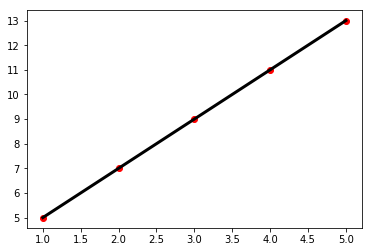

In [57]:
# plot data with axis labels
plt.scatter(x, y,  color='red')
plt.plot(x, y, color='black', linewidth=3)
plt.show()


### Use the sample mean to make a _very_ simple prediction...

The most basic "model" is just to predict the mean of Y. 

**PROBLEM**: Calculate and report the mean of the outcome variable `y`?

In [58]:
# compute the mean manually
mean_manually = sum(i for i in y)/(len(y))


In [59]:
# now use a function from the numpy package to calculate the mean
mean = np.mean(y)
print(mean)


9.0


**PROBLEM**: Plot our data as red dots, _overlay_ a plot of the DGP as a black line, and overlay a horizontal line at the mean of Y 

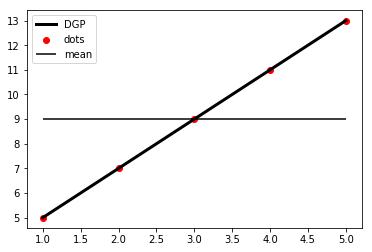

In [65]:
# plot mean prediction
plt.scatter(x, y,  color='red')
plt.plot(x, y, color='black', linewidth=3)
plt.hlines(mean, xmin=np.min(x), xmax=np.max(x))
plt.legend(['DGP','dots','mean'])
plt.show()


**PROBLEM**: How well does the mean fit our DGP? It fits badly

### Fit a simple linear regression

You will now try to estimate the coefficients for the `m` and `b` parameters you see in the DGP.  

**PROBLEM**: Prepare to do a linear regression to `X` and `y`.

Let's convert all data into arrays (as defined by the numpy package) so that we know it is valid for numerical computation.

In [23]:
# First, you need to reshape the X data into a "Design Matrix" (a two-dimensional shape)
#  use the reshape() method of the array class of the numpy package
#  your desing matrix with have multiple rows of observations, 
#     but only 1 column as there is one predictor
X = np.reshape(x, (len(x),-1)) 
print(X)


[[1]
 [2]
 [3]
 [4]
 [5]]


In [25]:
# Second, also covert your y data into a numpy array 
#   hint: no need to change the shape - a simple 1-dimensional array (the default) is fine
y = np.array(y)
print(y)


[ 5  7  9 11 13]


**PROBLEM**: Fit a linear regression for `y` and `X`

In [26]:
# fit a linear regression using the LinearRegression() model from sklearn
reg = LinearRegression().fit(X, y)


**PROBLEM**: Find and report the r-squared, coefficient m, and intercept for the model.

In [27]:
# evaluate the fit in terms of R^2 (i.e. variance explained)
reg.score(X, y)



1.0

In [36]:
# estimate coefficient m
m = reg.coef_[0]
print("%.5f" % m)


2.00000


In [37]:
# estimate intercept b
b = reg.intercept_
print("%.5f" % b)



3.00000


**PROBLEM**: Use the fitted regression model to calculate the predicted value of `y` at `x = 6`.

In [44]:
# use fitted model to predict y at x = 6
x = 6
X = np.reshape(x, (1,-1)) 
reg.predict(X)


array([15.])

**PROBLEM**: Show (by manual calculation) that the predicted value above matches the true DGP.

# PART 4: A SIMPLE CLASSIFICATION PROBLEM

We will now consider some data that will be generated by a *nonlinear* and *noisy* DGP. We want to predict two classes, where `y` equals `1` or `0`, that depend only on the value of `x`. 

Think back to the Credit Default demo. In this example, `y` stands for defaulting and `x` might stand for your amount of debt. For this simple scenario, the more debt you have, the more likely you are to default. We would like predictions to lie in the continuous inerval `[0,1]`.

In [120]:
# generate random samples with seed = 0 and look at the first 10 values of X

np.random.seed(0)
n_samples = 100

X = np.random.normal(size = n_samples)
X[:10]  # inspect the first 10 observations

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

For all values `X > 0`, we will set `y` equal to `1` and `0` otherwise. Add some random noise to `X`. 

In [121]:
# set y to 1 if X > 0

y = X > 0               # Hint: this creates a y array of True and False
y = y.astype(np.float)  # Hint: this converts booleans to 1.0 if try, and 0.0 if False
y[:10]                  # look at the first 10 entries of y

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 1.])

In [122]:
# add some Gaussian noise around the transition point of x = 0 
X = X + 0.2 * np.random.normal(size = n_samples)
X[:10]   # inspect first 10 entries of X

array([ 2.14068249,  0.1306054 ,  0.72464098,  2.43477254,  1.63293331,
       -0.58855364,  0.86736462, -0.30084817,  0.28136955,  0.70670146])

### Plot the data

Simply plot the data - plotting the data is key before fitting any statistical model. 

**PROBLEM**: Plot `X` and `y` on a scatterplot. Will a linear classifier fit these data well? 

The data distribution is discontinous so a linear model will not fit well.

<function matplotlib.pyplot.show(*args, **kw)>

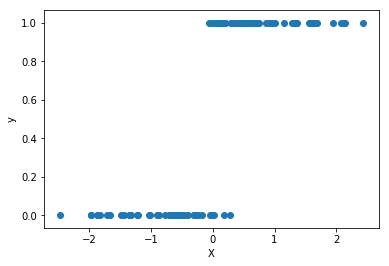

In [123]:
# scatterplot with axis labels
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show

### Fit a linear probability model

In this part, we simply plot the data. Plotting the data is key before fitting any statistical model. 

**PROBLEM**: Fit a linear regression and look at the intercept. Does the intercept have a reasonable values? Why not?

It should be closer to 0.5 but the numple of samples is small so it is normal to observe a small deviation of the intercept

In [124]:
# fit the linear regression (hint: call .reshape(-1, 1) on X to tell NumPy that there's only one predictor )
X = X.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
reg.intercept_



0.5216114089967183

**PROBLEM**: Plot the linear regression fit.

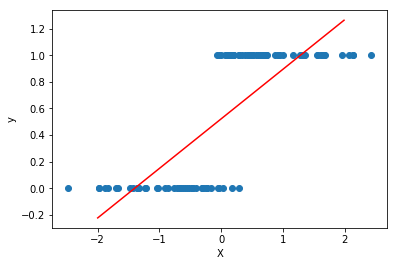

In [125]:
# plot linear regression fit
t = np.arange(-2, 2, 0.01).reshape(-1, 1)
Y_pred = reg.predict(t)
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.plot(t, Y_pred, color='red')




**PROBLEM**: What can you say about predictions for very small/large `x`? The prediction for small or large values is really bad.

### Now fit a sigmoidal logit model, which may better fit the data.

Remember that for historical reasons, this is called "logistic regression" -- but it is for classification, not regression.

**PROBLEM**: Fit a logit model. 

In [126]:
# fit the logistic regression
log_reg = LogisticRegression(solver='lbfgs').fit(X, y)

**PROBLEM**: Plot the fitted function. Hint: apply the expit() function to your prediction. This will convert the predictions to an inverse sigmoid shape. How does this model fit the data?

It fits the data much better

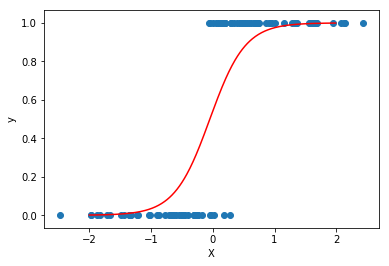

In [127]:
# plot linear regression fit
t = np.arange(-2, 2, 0.01).reshape(-1, 1)
Y_pred = log_reg.predict_proba(t)
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.plot(t, Y_pred[:,1], color='red')


# Part 5: Examine Empirical Distributions 

In this section we have already drawn three samples from three different distributions. These appear in the `data/` directory as the files: `data1.txt`, `data2.txt`, `data3.txt`  

You do not know the true distributions from which these samples were drawn - but you can investigate them and try to guess...

### Helper Functions

**PROBLEM**: Define a function to load a list of numbers from a text file.

In [128]:
def load_to_list(filename):
    number_list = []
    file=open("data/"+filename,"r")
    contents = file.read()
    numbers = contents.split("\n")
    for number in numbers:
        number_list.append(float(number))
    return number_list



**PROBLEM**: Define a function to plot a histogram for some data.  

In [129]:
def plot_histogram(data):
    sns.distplot(data) 

### Distribution 1

**PROBLEM**: Using your functions above, plot a histogram of `data1.txt`

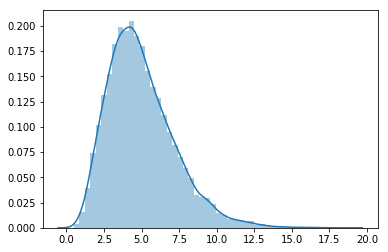

In [130]:
data1 = load_to_list("data1.txt")
plot_histogram(data1)


**PROBLEM**: Using your functions above, plot a histogram of the logged values of `data1.txt`

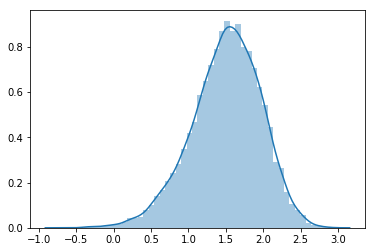

In [131]:
plot_histogram(np.log(data1))


### Distribution 2

**PROBLEM**: Using your functions above, plot a histogram of `data2.txt`

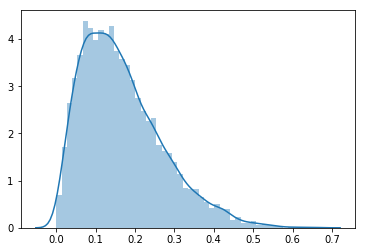

In [132]:
data2 = load_to_list("data2.txt")
plot_histogram(data2)


**PROBLEM**: Using your functions above, plot a histogram of the logged values of `data2.txt`

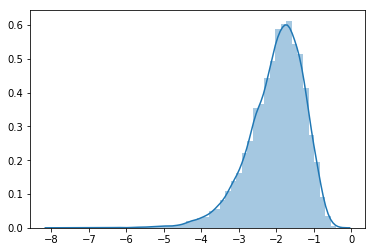

In [133]:
plot_histogram(np.log(data2))

### Distribution 3

**PROBLEM**: Using your functions above, plot a histogram of `data3.txt`

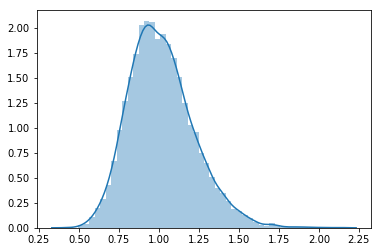

In [134]:
data3 = load_to_list("data3.txt")
plot_histogram(data3)


**PROBLEM**: Using your functions above, plot a histogram of the logged values of `data3.txt`

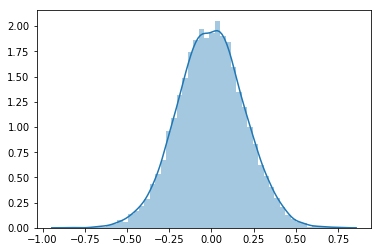

In [135]:
plot_histogram(np.log(data3))

### Make educated guesses about the distributions

Do some self-directed research to learn about different types of continuous distributions (guassian, gamma, exponential, etc.). Can you identify a distribution that you think could generated each of the three data files you observe above? If so, what kind of distributions? Explain each one for each file.

**PROBLEM**: What might be the distribution of `data1.txt`? 

It might be a gamma distribution. It could also be a beta distribution but the logarithm of it does not return a distribution with only negativ values. Thus we can conclude that it is in fact a gamma distribution.

**PROBLEM**: What might be the distribution of `data2.txt`?

It might be a beta distribution, because applying the logarithm of it gives a distribution with only negativ values.

**PROBLEM**: What might be the distribution of `data3.txt`?

It might be a Log-normal distribution, because by applying the logarithm on the data, we see a normal distrubtion.

### Estimate parameters for the distributions

**PROBLEM**: Based on your guess as to the true distribution of the distribution for the `data1.txt` sample, estimate parameters for that distribution.

In [143]:
parameters = gamma.fit(data1)
print(parameters)

(4.806326226036164, 0.13107019942532222, 1.0080064278223309)


**PROBLEM**: Based on your guess as to the true distribution of the distribution for the `data2.txt` sample, estimate parameters for that distribution.

In [144]:
parameters = beta.fit(data2)
print(parameters)

(2.0795534252326036, 10.770049940977472, -0.0010433382783147755, 1.0410031987598831)


**PROBLEM**: Based on your guess as to the true distribution of the distribution for the `data3.txt` sample, estimate parameters for that distribution.

In [145]:
parameters = lognorm.fit(data3)
print(parameters)

(0.19077296304554658, -0.03900961681303078, 1.036239032984593)


### Comment on your estimated parameters for the above distributions

**PROBLEM**: Will the estimated parameters reported in Question 6 above be the **_True_** population parameters? Why or why not?

# Part 6: Plot some Theoretical Distributions 

In the previous section, you examined empirical distributions for three files. Now you will plot the theoretical probability density function (pdf) from one particular distribution: the Beta distribution.   

The Beta distribution has two parameters: $\alpha$ and $\beta$).


**PROBLEM**: Plot the **pdf** for a beta distribution with parameters $\alpha = 2$ and $\beta = 5$.

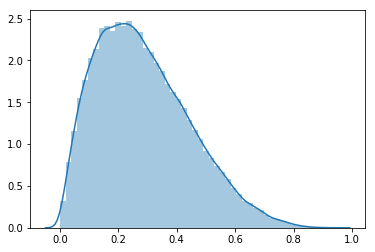

In [199]:
beta_data = beta.rvs(2,5,size=100000)
sns.distplot(beta_data) 

**PROBLEM**: Now plot the same pdf with vertical lines and labels for the lines at the mean, median, and mode of the same distribution as above.

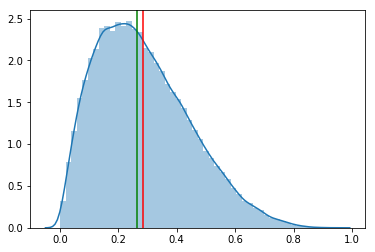

In [201]:
from collections import Counter 

plot_histogram(beta_data)
# plot mean
mean = np.mean(beta_data)
plt.axvline(x=mean, color='red')
# plot median
median = np.median(beta_data)
plt.axvline(x=median, color='green')
# plot mode

**PROBLEM**: Comment on why (intuitively) the mean, median and mode are ordered as shown above. 

Very big values tend to pull the mean toward the right. The median seperates two equal areas under the curve so it makes sense that it is placed on the left of the mean. The mode crosses the maximum of the distribution.

**PROBLEM**: Comment on the nature of the probability distribution function for the outcome. What's the distribution skew and kurtosis? How can we interpret skewness? Why does skewness matter? What migh be a remedy to "de-skew" data?

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. For this beta distribution, we compute a postitive skew which describe quantitatively the distance between the mean and the median.

kurtosis is a measure of the "tailedness" of the probability distribution. We compute a negative kurtosis which indicates that the distribution has lighter tails and a flatter peak than the normal distribution.

Both of these describe the shape of the probabiliy distribution. 

In [209]:
# compute skewness and kurtosis to use in your answer
mean, var, skew, kurt = beta.stats(2, 5, moments='mvsk')
print(skew,kurt)


0.5962847939999439 -0.12
